<a href="https://colab.research.google.com/github/Ayushman0Singh/PlayStoreAppReviews-EDA/blob/main/Ayushman_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

The android Play-store is a vast place with a plethora of applications. There are many addictive and engaging applications which will just suck you in but on the other end there are applications which are not used very often and lie dead in mundane corners of the Play-store. 

It is crusial for the developers as well as investors to understand what differentiates an application from the others in order to have a successful app-making business.





I will attempt to identify the keys factors which determine the success of an application. 

To do that we must first answer. What is a 'successful' app? Success is qualitative term (since its not defined in the problem statment). But given the data set, we have many metrics to quantify the success of an application. **The key KPI to measure success of an application is the rating it recieves from its users**.
 


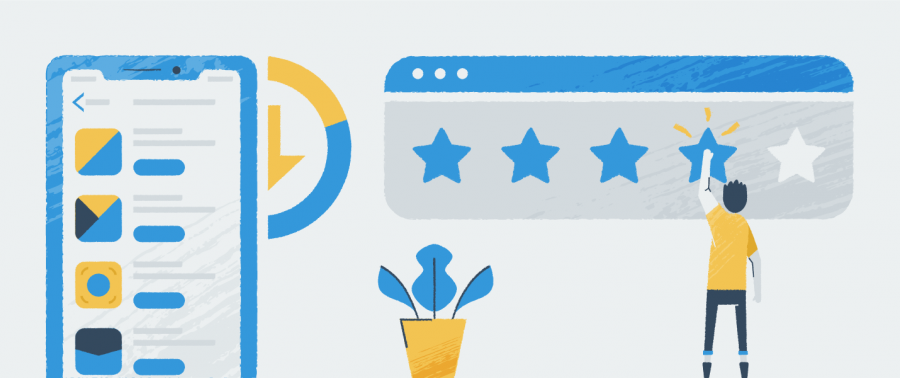

In [1]:
#inviting friends to help with the assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#fetching assignment from the study-table
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
#Loading the data
app_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA/Play Store Data.csv')
reviews_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/EDA/User Reviews.csv')

In [30]:
#checking assignment difficulty / First look of the data
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [39]:
print(reviews_df['App'].nunique()) #checking for unique values in each df
len(app_df['App'].unique()) ##checking for unique values in each df 


1074


9660

In [32]:
app_df.info() #getting dataframe info and checking columns with null-values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [33]:
app_df.describe(include = 'all') #overview of all the columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print(app_df.isnull().sum()) #number of null values each column
app_df.describe().columns #rating is the only float columns with many nan-values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Index(['Rating'], dtype='object')

We have multiple options to treat these null values.

 1) We can fill these null values.


 2)replace these null values.


 3) drop the rows with null values.

Here, I have chosen to drop the rows without a rating. Since rating is very a important factor in determining app engagement and sucess. 


In [62]:
app_df = app_df[app_df['Rating'].notna()] # selecting all the rows with non null rating values.
app_df = app_df.dropna(how='any') # droping rows with null values from all the columns
app_df.isnull().sum() # checking for null values again

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [67]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [71]:
reviews_df.info()  # checking null values in the reviews dataframe
reviews_df = reviews_df.dropna() # removing null values from the reviews dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [73]:
reviews_df.info() # Null values droped since we only need rows with sentiment data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


The Data type of all these columns is not correct or usable for EDA. 

Columns like reviews, size, installs, price should be Float data type. some of the other columns should be string data type. 

Lets proceed to do some data cleaning before the analysis.

 **Further thoughts and Deeper analysis**
 
Looking at these columns I have decided to quantify an app as sucessful based on 2 features. These two features are Ratings and Installations. The reasons behind these choice are as follows:

1. An app can have very high rating with very few installations. This does not qualify an app to be sucessfull. Since the number of users is small and thier reviews could be biased. 

2. If an app has high rating and high number of installations then it can be considered as sucessfull. since the sample size for the ratings is bigger and more reliable.

*Potential problems with this*
1. We might miss out on apps which are highly rated and successful but have low number of installations since the catagory they belong to is not very famous and has low users overall. A solution for this could be to group by catagory and then evluate the sucessful apps in each catagory